In [26]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import DataStructs
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [27]:
# Tanimoto 유사도 행렬 계산 함수
def calculate_tanimoto_similarity(smiles_list):
    generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
    mols = [Chem.MolFromSmiles(smile) for smile in smiles_list]
    fps = [generator.GetFingerprint(mol) for mol in mols]
    n = len(fps)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                similarity_matrix[i, j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])
    
    return similarity_matrix

# 계층적 클러스터링 함수
def hierarchical_clustering(smiles_list, top_n=9):
    similarity_matrix = calculate_tanimoto_similarity(smiles_list)
    distance_matrix = 1 - similarity_matrix
    Z = linkage(distance_matrix, 'ward')
    cluster_labels = fcluster(Z, t=top_n, criterion='maxclust')
    
    top_n_smiles = []
    for cluster in range(1, top_n + 1):
        cluster_indices = [i for i, x in enumerate(cluster_labels) if x == cluster]
        top_n_smiles.append([smiles_list[i] for i in cluster_indices])
    
    return top_n_smiles, Z



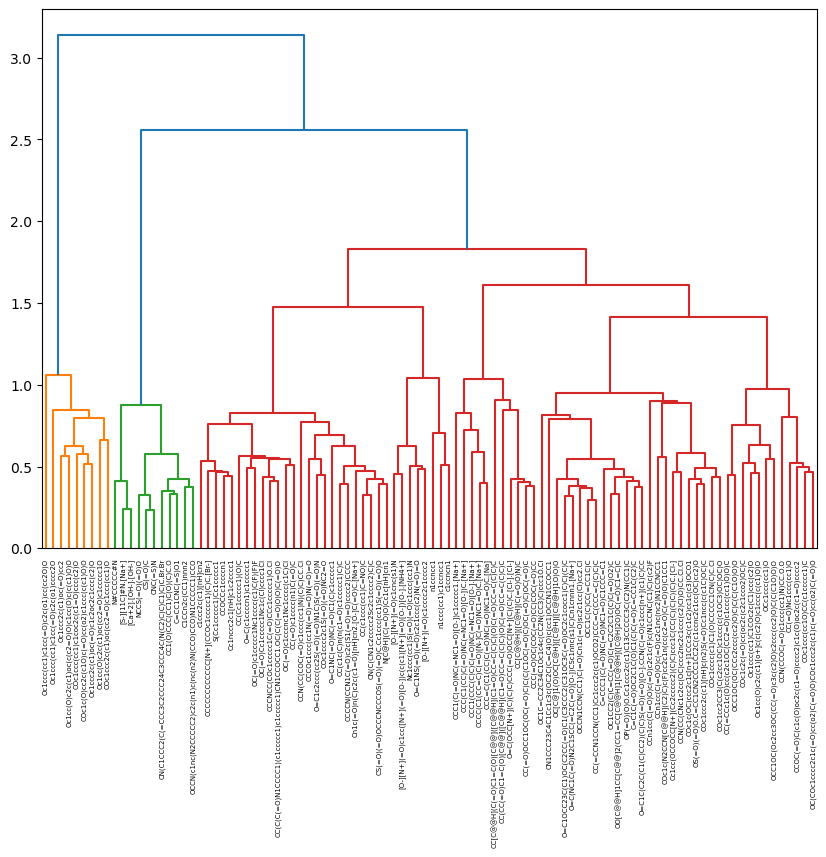

[['Oc1cc(O)c2c(c1)oc(cc2=O)c1ccccc1O', 'Oc1ccc(cc1)c1cc(=O)c2c(o1)cccc2O', 'COc1c(O)cc2c(c1O)c(=O)cc(o2)c1ccc(c(c1)O)O', 'COc1ccc(cc1)c1coc2c(c1=O)ccc(c2)O', 'Oc1ccc2c(c1)oc(=O)cc2', 'Oc1cc(O)c2c(c1)oc(c(c2=O)O)c1cc(O)c(c(c1)O)O', 'Oc1ccc2c(c1)oc(=O)c1c2oc2c1ccc(c2)O', 'COc1ccc2c(c1)oc(cc2=O)c1ccc(cc1)O'], ['Oc1ccc(cc1)c1cc(=O)c2c(o1)cc(cc2O)O'], ['CS(=O)C', 'CNC(=S)N', 'CN(C1CCC2(C(=CCC3C2CCC24C3CCC4C(N(C2)C)C)C1)C)C.Br.Br', 'CC1(O)CCC(CC1)C(O)(C)C.O', 'C=CC1CNC(=S)O1', 'NCCS(=O)(=O)O', '[S-][11C]#N.[Na+]', '[Ca+2].[OH-].[OH-]', 'C1CCn2c(CC1)nnn2', 'N#CCCCC#N', 'OCCN(c1nc(N2CCCCC2)c2c(n1)c(nc(n2)N(CCO)CCO)N1CCCCC1)CCO'], ['CC(c1ccc(cc1)C=NO)C', 'OC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl', 'S(Cc1ccccc1)Cc1ccccc1', 'Cn1c(=O)n(C)c2c(c1=O)[nH]cn2.[O-]C(=O)C.[Na+]', 'CN(C(CN1c2ccccc2Sc2c1cccc2)C)C', 'CC(Cc1ccccc1)(O)C', 'CCCOc1ccc(cc1N(=O)=O)N(=O)=O', 'O=C(c1ccccn1)c1ccccc1', 'CCOCCc1ccccn1', 'CS(=O)(=O)OCCCNCCCOS(=O)(=O)C.Cc1ccc(cc1)S(=O)(=O)O', 'OC(=O)c1cccnc1Nc1cccc(c1C)Cl', 'CCCNCC(COc1ccccc1C(=O

In [28]:
# CSV 파일을 읽어옵니다.
df = pd.read_csv('../data/sampled_mix/1.bitter-train-100.csv')

# 'Canonical SMILES' 컬럼의 데이터를 리스트로 변환합니다.
smiles_list = df['Canonical SMILES'].tolist()

# Tanimoto 유사도 행렬 계산 및 계층적 클러스터링 수행
similarity_matrix = calculate_tanimoto_similarity(smiles_list)
top_n_smiles, Z = hierarchical_clustering(smiles_list, top_n=9)

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=smiles_list, leaf_rotation=90)
plt.show()

# Top 9 클러스터 출력
print(top_n_smiles)